The ancestor Shapley Values in the article

In [1]:
import sys
import time
import pandas as pd
import numpy as np
from itertools import combinations
from shap import Explanation
import sys
import torch
import math
import random
from sklearn.linear_model import LinearRegression
import math
import shap
import time
import itertools
from weighted_shapley import Weighted_Shapley
import warnings
warnings.filterwarnings('ignore')
np.random.seed(133)

In [2]:
# data creation
x1 =np.random.normal(0, 1, size=(100000, 1)) 
x2 =0.2*np.random.normal(0, 1, size=(100000, 1)) + 0.98*x1
x6 = 0.707 * np.random.normal(0, 1, size=(100000, 1)) + 0.707 * x2 
arr = np.hstack((x1, x2, x6))
pd_data = pd.DataFrame(arr, columns=['x1', 'x2', 'x6'])
pd_data = (pd_data-pd_data.mean())/pd_data.std()
X = pd_data[['x1', 'x2']]
y = pd_data["x6"]
feature_num = 2

In [3]:
pd_data.corr()

,x1,x2,x6
x1,1.000000,0.979708,0.689702
x2,0.979708,1.000000,0.703308
x6,0.689702,0.703308,1.000000


In [4]:
# Creating model f
lr = LinearRegression()
lr.fit(X, y)
w = lr.coef_[0]

In [5]:
# It is a linear regression model with following coefficients
lr.coef_

array([0.0165681, 0.6870759])

In [6]:
import itertools
#to create the oracle:
#we create a dictionary that maps each feature to a set of sets of features that d-separate the variable from X_[n+1]
#nodes that are directly connected to X_{n+1} can not be d-separated from X_{n+1} by any set of nodes thus the set of sets is empty
#for other nodes we  need to identify all such sets
#for node X1 (for the example in the supplementary material) all subsets of variables that include X_2 d-separate it from X_[6]

oracle = {}

oracle['x1'] = frozenset({'x2}'})

#X2 and X3 are directly connected thus the set of sets is empty
oracle['x2'] = set()




In [7]:
print(f'The prediction we want to explain is {lr.predict(X.iloc[8].values.reshape(1, -1))}')
print(f'with input features values: {X.iloc[8].values.reshape(1, -1)}')

The prediction we want to explain is [0.38696334]
with input features values: [[0.5686709  0.54949031]]


In [8]:

def create_ordering(ancestors, features):
    s = set(ancestors)
    print(s)
    non_ancestor = [x for x in features if x not in s]
    perms1 = list(itertools.permutations(ancestors))
    perms2 = list(itertools.permutations(non_ancestor))
    ancestor_compatible_perms = []
    for item1 in perms1:
        for item2 in perms2:
            #item1 is the permutation of the ancestors
            #item2 is the permutation of the other variables
            temp = item1 + item2
            ancestor_compatible_perms.append(temp)
    return tuple(non_ancestor), tuple(ancestor_compatible_perms)





In [9]:

# Ancestor oracle is a dictionary that maps each graph to its ancestors and non-ancestors
# This oracle is for g^*_{2} in the paper

ancestor_oracle = {}
feature_names = ('x1', 'x2')

graph_1_ancestors = ('x1', 'x2')
non_ancestor1, graph_1_orderings = create_ordering(graph_1_ancestors, feature_names)
graph1 = {'ancestors': graph_1_ancestors, 'non_ancestor': non_ancestor1}
print(graph1)
ancestor_oracle['graph1'] = graph1    
   
graph_2_ancestors = ('x2', )
non_ancestor2, graph_2_orderings = create_ordering(graph_2_ancestors, feature_names)
graph2 = {'ancestors': graph_2_ancestors, 'non_ancestor': non_ancestor2}
ancestor_oracle['graph2'] = graph2

{'x1', 'x2'}
{'ancestors': ('x1', 'x2'), 'non_ancestor': ()}
{'x2'}


graph1
graph2
 data point type is :<class 'pandas.core.series.Series'>
2


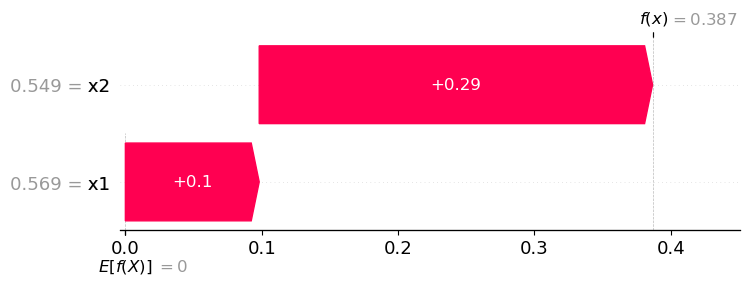

In [11]:
#We find Ancestor Shapley values with apriori knowledge g^*_{2}
from weighted_shapley import Weighted_Shapley
sh = Weighted_Shapley(X, y, lr, feature_num)
b = sh.find_shapley(X.iloc[8], explanation_type="graph ancestor", ancestor_oracle=ancestor_oracle)
shap.waterfall_plot(b)

 data point type is :<class 'pandas.core.series.Series'>
2


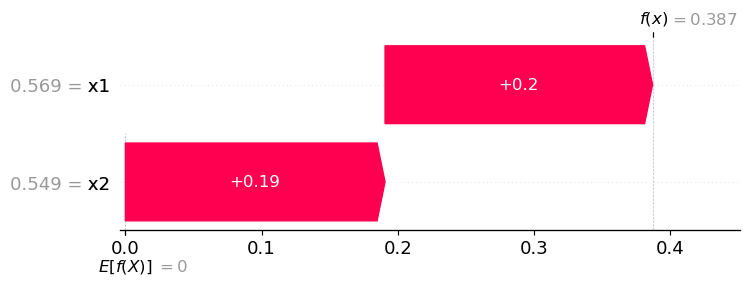

In [12]:
# Standard Shapley values
from weighted_shapley import Weighted_Shapley
sh = Weighted_Shapley(X, y, lr, feature_num)
c = sh.find_shapley(X.iloc[8], explanation_type="standard", sparsest_oracle=oracle)
shap.waterfall_plot(c)

('x1', 'x2')
 data point type is :<class 'pandas.core.series.Series'>
2


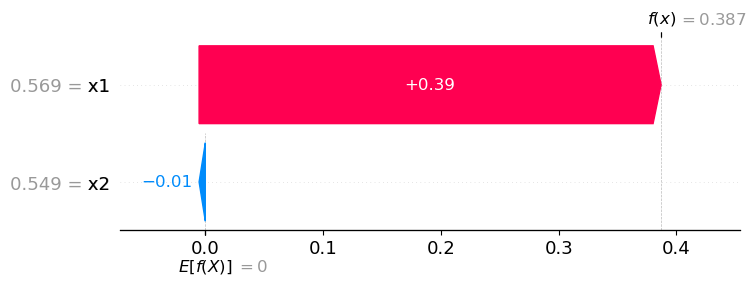

In [13]:
#Asymmetric Shapley values for g^*_{1}
single_oracle=(('x1', 'x2'),)
sh = Weighted_Shapley(X, y, lr, feature_num)
d = sh.find_shapley(X.iloc[8], explanation_type="ancestor", ancestor_oracle=single_oracle)
shap.waterfall_plot(d)

graph1
 data point type is :<class 'pandas.core.series.Series'>
2


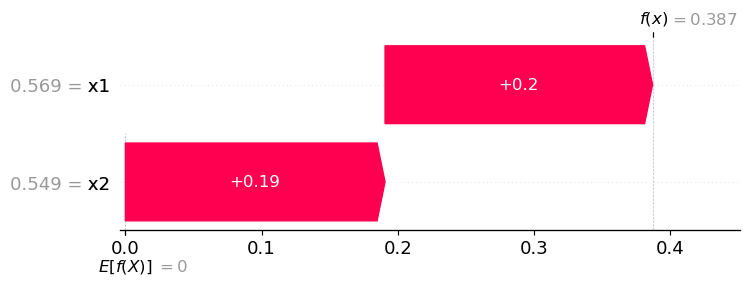

In [14]:
# Ancestor Shapley values for g^*_{1}
ancestor_oracle2 = {}
ancestor_oracle2['graph1'] = graph1

from weighted_shapley import Weighted_Shapley
sh = Weighted_Shapley(X, y, lr, feature_num)
b = sh.find_shapley(X.iloc[8], explanation_type="graph ancestor", ancestor_oracle=ancestor_oracle2)
shap.waterfall_plot(b)

In [15]:
# Creating the oracle for g^*_{3}
ancestor_oracle = {}
feature_names = ('x1', 'x2')

graph_1_ancestors = ('x1', 'x2')
non_ancestor1, graph_1_orderings = create_ordering(graph_1_ancestors, feature_names)
graph1 = {'ancestors': graph_1_ancestors, 'non_ancestor': non_ancestor1}
print(graph1)
ancestor_oracle['graph1'] = graph1    
   
graph_2_ancestors = ('x2', )
non_ancestor2, graph_2_orderings = create_ordering(graph_2_ancestors, feature_names)
graph2 = {'ancestors': graph_2_ancestors, 'non_ancestor': non_ancestor2}
ancestor_oracle['graph2'] = graph2

graph3_ancestors = tuple()
non_ancestors3, graph_3_orderings = create_ordering(graph3_ancestors, feature_names)
graph3 = {'ancestors': graph3_ancestors, 'non_ancestor': non_ancestors3}
ancestor_oracle['graph3'] = graph3

{'x1', 'x2'}
{'ancestors': ('x1', 'x2'), 'non_ancestor': ()}
{'x2'}
set()


graph1
graph2
graph3
 data point type is :<class 'pandas.core.series.Series'>
2


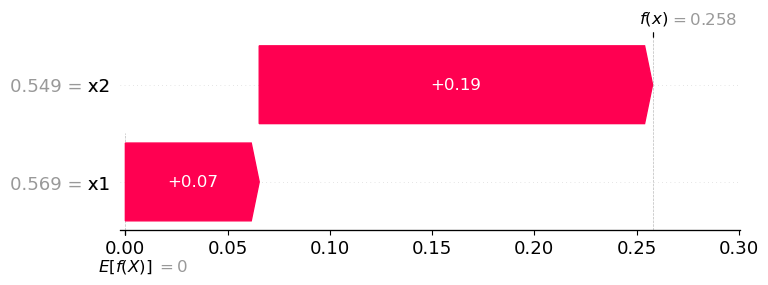

In [16]:
# Ancestor Shapley values with apriori knowledge g^*_{3}
from weighted_shapley import Weighted_Shapley
sh = Weighted_Shapley(X, y, lr, feature_num)
b = sh.find_shapley(X.iloc[8], explanation_type="graph ancestor", ancestor_oracle=ancestor_oracle)
shap.waterfall_plot(b)